# Assignment 6
------------------
Useful links:
- TA's hints: https://docs.google.com/document/d/1L_ZBqnzmNzejw8aPeRZ0xJcWgIKtX4RHtt_1Da_NDfc/edit

## Exercise 1
------------------

#### Implement the Metropolis-Hastings (M-H) algorithm to simulate gamma distribution $Ga(\alpha, \beta)$, using exponential distribution $Exp(\lambda)$ as the proposal distribution. Simulate $Ga(3, 1)$. Use the independence chains version of M-H.

First, find the optimal proposal distribution, that is, the value for $\lambda$ that maximises the acceptance probability. Determine this value with precision ± 0.04. To do this, compute acceptance ratios $\alpha$ for various lambda values within an appropriate interval. For instance, choose initially $\lambda_i \in [0.1, 1]$, where $i = 1, 2, … , N$, and narrow down the interval until you can determine $\lambda = \lambda_{opt}$. Choose $N = 10^5$ as the number of samples (iterations). (Note that you have distributions in the equation for $\alpha$.) Do this even if you should be able to figure out the exact value for the optimum $\lambda = \lambda_{opt}$. In your solution, show at least the plot for the minimal interval of $\lambda$, where $\alpha$ is on the vertical axis and $\lambda$ is on the horizontal axis, proving that you are picking the correct value  $\lambda = \lambda_{opt}$. Of course, print out your $\lambda_{opt}$. (Securing my back here for peergrade law suits.)


The maximum acceptance probability is 0.63676. It is reached with lambda_opt value equal to 0.32 +- 0.04.


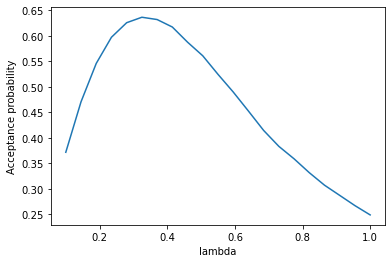

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import gamma, expon
seed = 123


N = 10**5
lambdas = np.linspace(0.1, 1, 21)
ratios = [] # Save acceptance ratios for each lambda value here
lambda_opt = 0
max_acceptance = 0

for lam in lambdas:
    # Initial x value
    x = [np.random.exponential(1/lam)]
    count = 0
    for i in range(N):
        y = np.random.exponential(1/lam)
        R = (gamma.pdf(y, a=3, scale=1) / expon.pdf(y, scale=1/lam)) / (gamma.pdf(x[i], a=3, scale=1) / expon.pdf(x[i], scale=1/lam))
        A = min(1, R) 
        if np.random.random() <= A:
            x.append(y)
            count += 1
        else:
            x.append(x[i])
    acceptance_prob = count/N 
    ratios.append(acceptance_prob)
    if acceptance_prob > max_acceptance:
        lambda_opt = lam
        max_acceptance = acceptance_prob
        
plt.plot(lambdas, ratios)
plt.xlabel("lambda")
plt.ylabel("Acceptance probability")

print("The maximum acceptance probability is {}. It is reached with lambda_opt value equal to {} +- 0.04.".format(max_acceptance, np.round(lambda_opt, 2)))

Second, use the optimal proposal distribution to simulate $Ga(3,1)$. Simulate for $10^6$ samples. Plot the resulting distribution together with the corresponding correct gamma function (line plot).

In [2]:
N = 10**6
lam = lambda_opt

x = [np.random.exponential(1/lam)]
for i in range(N):
    y = np.random.exponential(1/lam)
    R = (gamma.pdf(y, a=3, scale=1) / expon.pdf(y, scale=1/lam)) / (gamma.pdf(x[i], a=3, scale=1) / expon.pdf(x[i], scale=1/lam))
    A = min(1, R) 
    if np.random.random() <= A:
        x.append(y)
    else:
        x.append(x[i])
x = np.array(x)

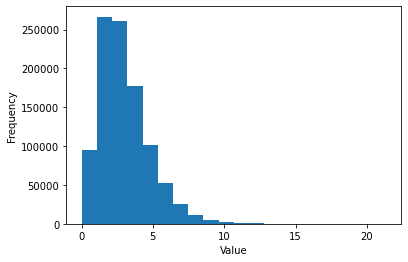

In [3]:
# Plot of unnormalized histogram of the simulated distribution

plt.hist(x, bins = 20)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

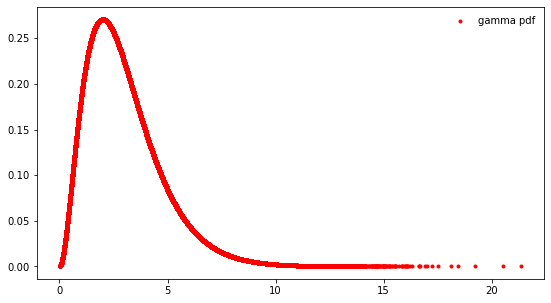

In [9]:
# The correct corresponding gamma function

fig = plt.figure(figsize=(20, 5));

ax = fig.add_subplot(121)
ax.plot(x, gamma.pdf(x, 3), 'r.', label = 'gamma pdf')
ax.legend(loc='best', frameon=False)

plt.show()

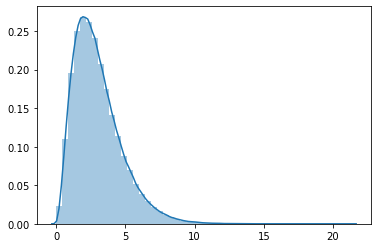

In [10]:
# Normalized histogram and corresponding correct gamma function in one plot.

import seaborn as sns
sns.distplot(x)

Third, compute and print the numerical values for mean and variance for the resulting distribution.

In [11]:
print("The mean value of the simulated distribution is {} and the variance is {}.".format(np.mean(x), np.var(x)))

The mean value of the simulated distribution is 3.0018607117904343 and the variance is 3.0001053334982446.
